In [2]:
import os, geopandas as gpd
PeruDepartamentos=gpd.read_file(os.path.join("PeruMaps.gpkg"), layer = "Departamentos")

<Axes: >

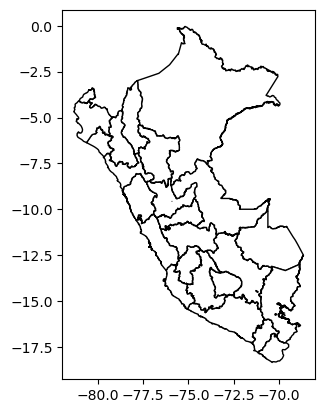

In [3]:
PeruDepartamentos.plot(facecolor="white", edgecolor = "black")

In [8]:
import pandas as pd
DatosDepartamentos=pd.read_excel(os.path.join("Datos_por_zona", "DatosRegionales", "DatosRegionales.xlsx"))

In [9]:
#Remover tildes
DatosDepartamentos['Departamento']=DatosDepartamentos['Departamento'].str.normalize('NFKD').\
                        str.encode('ascii', errors='ignore').str.decode('utf-8').str.upper()

In [10]:
DatosDepartamentos.iloc[:,2:].describe().loc[['min','max']].T

,min,max
Transferencia2023,1757000.00,7.004200e+07
Transferencia2022,2538250.00,9.868275e+07
Transferencia2021,2582500.00,1.265355e+08
Transferencia2020,2044000.00,1.109562e+08
Transferencia2019,1629750.00,9.329250e+07
Transferencia2018,1486750.00,9.253300e+07
Transferencia2017,1372000.00,8.741175e+07
Transferencia2016,1198000.00,8.358800e+07
Transferencia2015,970750.00,8.239000e+07
Transferencia2014,532107.03,8.068887e+07


<Axes: >

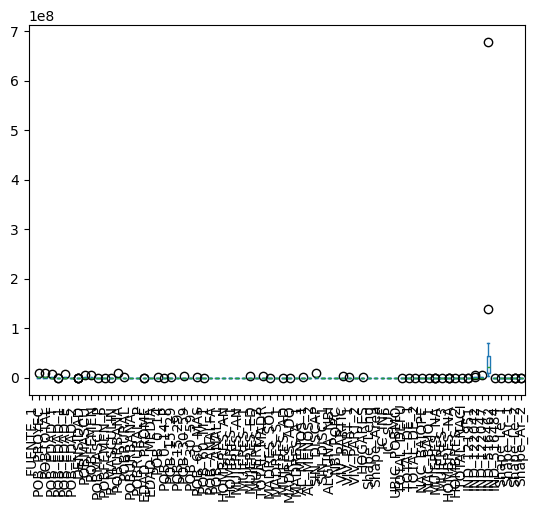

In [11]:
import matplotlib.pyplot as plt

PeruDepartamentos.iloc[:,2:].plot(kind='box', rot=90)

In [12]:
columnsToScale=['Transferencia2022'] # you can add more columns

from sklearn import preprocessing

# prepare the process
minmaxSc = preprocessing.MinMaxScaler(feature_range=(0, 10))# default is 0,1

# apply process
minmaxResult = minmaxSc.fit_transform(DatosDepartamentos[columnsToScale])

# result
minmaxResult

array([[ 1.9640229 ],
       [ 5.38751567],
       [ 4.08039461],
       [ 1.28717711],
       [ 5.27549678],
       [10.        ],
       [ 0.45754047],
       [ 5.94615397],
       [ 3.40347082],
       [ 4.28425443],
       [ 0.78933272],
       [ 3.95170811],
       [ 3.81503882],
       [ 2.76087036],
       [ 5.5730437 ],
       [ 4.22920708],
       [ 0.        ],
       [ 0.27248049],
       [ 0.81920963],
       [ 6.90052473],
       [ 8.81646896],
       [ 3.25200609],
       [ 0.15349292],
       [ 0.45829455],
       [ 1.91279792]])

In [13]:
# new values to new column
DatosDepartamentos['Trans2022_minMax']=minmaxResult

In [14]:
DatosDepartamentos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ubigeo             25 non-null     int64  
 1   Departamento       25 non-null     object 
 2   Capital            25 non-null     object 
 3   Transferencia2023  25 non-null     int64  
 4   Transferencia2022  25 non-null     int64  
 5   Transferencia2021  25 non-null     int64  
 6   Transferencia2020  25 non-null     int64  
 7   Transferencia2019  25 non-null     int64  
 8   Transferencia2018  25 non-null     int64  
 9   Transferencia2017  25 non-null     int64  
 10  Transferencia2016  25 non-null     int64  
 11  Transferencia2015  25 non-null     int64  
 12  Transferencia2014  25 non-null     float64
 13  Transferencia2013  25 non-null     float64
 14  Trans2022_minMax   25 non-null     float64
dtypes: float64(3), int64(10), object(2)
memory usage: 3.1+ KB


In [15]:
convert_dict = {'Transferencia2023': float,
                'Transferencia2022': float,
                'Transferencia2021': float,
                'Transferencia2020': float,
                'Transferencia2019': float,
                'Transferencia2018': float,
                'Transferencia2017': float,
                'Transferencia2016': float,
                'Transferencia2015': float
                }
 
DatosDepartamentos = DatosDepartamentos.astype(convert_dict)
print(DatosDepartamentos.dtypes)

Ubigeo                 int64
Departamento          object
Capital               object
Transferencia2023    float64
Transferencia2022    float64
Transferencia2021    float64
Transferencia2020    float64
Transferencia2019    float64
Transferencia2018    float64
Transferencia2017    float64
Transferencia2016    float64
Transferencia2015    float64
Transferencia2014    float64
Transferencia2013    float64
Trans2022_minMax     float64
dtype: object


In [16]:
PeruDepartamentos.shape,DatosDepartamentos.shape

((25, 80), (25, 15))

In [17]:
PeruDepartamentos.rename(columns = {'NOMBDEP':'Departamento'}, inplace = True)
PeruDepartamentos.head()

,OBJECTID,CCDD,Departamento,FUENTE,FUENTE_1,POB_PROYEC,POBTOTAL,POB_EDAD_T,POB_EDAD_1,POB_EDAD_E,...,IND_121951,IND_122042,IND_122047,IND_516462,IND_516484,Shape_Le_1,Shape_Ar_1,Shape_Le_2,Shape_Ar_2,geometry
0,1.0,01,AMAZONAS,INEI - CPV RESULTADOS,NaN,426806.0,417365.0,289648.0,69.4,239212.0,...,2139.0,3.184694e+05,3.745422e+05,5094318.10,34164.0,0.022988,0.000013,12.894071,3.203362,"POLYGON ((-77.81211 -2.98962, -77.81332 -2.990..."
1,2.0,02,ANCASH,INEI - CPV RESULTADOS,NaN,1180638.0,1139115.0,850842.0,74.7,701614.0,...,9366.0,2.252303e+06,1.363318e+06,34431748.77,74385.0,0.000000,0.000000,11.640227,2.954639,"POLYGON ((-77.64692 -8.05086, -77.64669 -8.052..."
2,3.0,03,APURIMAC,INEI - CPV RESULTADOS,NaN,430736.0,424259.0,310196.0,73.1,252356.0,...,3723.0,7.025553e+05,6.626253e+05,8673503.09,48594.0,0.000000,0.000000,7.730082,1.765933,"POLYGON ((-73.74632 -13.17456, -73.74570 -13.1..."
3,4.0,04,AREQUIPA,INEI - CPV RESULTADOS,NaN,1497438.0,1460433.0,1135965.0,77.8,970511.0,...,10670.0,2.094167e+06,1.296536e+06,64872968.90,48033.0,0.000000,0.000000,17.391102,5.330046,"POLYGON ((-71.98109 -14.64062, -71.98093 -14.6..."
4,5.0,05,AYACUCHO,INEI - CPV RESULTADOS,NaN,668213.0,650940.0,478429.0,73.5,390780.0,...,4699.0,9.729801e+05,9.490687e+05,14610956.27,58941.0,0.000000,0.000000,17.132543,3.643617,"POLYGON ((-74.34843 -12.17503, -74.35000 -12.1..."


In [18]:
PeruMapaOficial22 = DatosDepartamentos.merge(PeruDepartamentos,
                                           how='inner',left_on='Departamento',right_on='Departamento')

In [19]:
PeruMapaOficial22.head()

,Ubigeo,Departamento,Capital,Transferencia2023,Transferencia2022,Transferencia2021,Transferencia2020,Transferencia2019,Transferencia2018,Transferencia2017,...,IND_121951,IND_122042,IND_122047,IND_516462,IND_516484,Shape_Le_1,Shape_Ar_1,Shape_Le_2,Shape_Ar_2,geometry
0,1,AMAZONAS,Chachapoyas,14922000.0,21421250.0,26711750.0,23282750.0,19145500.0,18791000.0,18377250.0,...,2139.0,3.184694e+05,3.745422e+05,5094318.10,34164.0,0.022988,0.000013,12.894071,3.203362,"POLYGON ((-77.81211 -2.98962, -77.81332 -2.990..."
1,2,ANCASH,Huaraz,38474000.0,54336250.0,69794500.0,61096250.0,51928000.0,51692750.0,50029500.0,...,9366.0,2.252303e+06,1.363318e+06,34431748.77,74385.0,0.000000,0.000000,11.640227,2.954639,"POLYGON ((-77.64692 -8.05086, -77.64669 -8.052..."
2,3,APURIMAC,Abancay,29541000.0,41769000.0,53457500.0,46832500.0,39743500.0,39522750.0,39474500.0,...,3723.0,7.025553e+05,6.626253e+05,8673503.09,48594.0,0.000000,0.000000,7.730082,1.765933,"POLYGON ((-73.74632 -13.17456, -73.74570 -13.1..."
3,4,AREQUIPA,Arequipa,10547000.0,14913750.0,19065250.0,16707000.0,14020000.0,13881750.0,13308000.0,...,10670.0,2.094167e+06,1.296536e+06,64872968.90,48033.0,0.000000,0.000000,17.391102,5.330046,"POLYGON ((-71.98109 -14.64062, -71.98093 -14.6..."
4,5,AYACUCHO,Ayacucho,37669000.0,53259250.0,68288250.0,59865500.0,50904000.0,50739250.0,49619250.0,...,4699.0,9.729801e+05,9.490687e+05,14610956.27,58941.0,0.000000,0.000000,17.132543,3.643617,"POLYGON ((-74.34843 -12.17503, -74.35000 -12.1..."


In [20]:
PeruMapaOficial22 = PeruDepartamentos.merge(DatosDepartamentos,
                                           how='inner',left_on='Departamento',right_on='Departamento')

In [21]:
PeruMapaOficial22

,OBJECTID,CCDD,Departamento,FUENTE,FUENTE_1,POB_PROYEC,POBTOTAL,POB_EDAD_T,POB_EDAD_1,POB_EDAD_E,...,Transferencia2021,Transferencia2020,Transferencia2019,Transferencia2018,Transferencia2017,Transferencia2016,Transferencia2015,Transferencia2014,Transferencia2013,Trans2022_minMax
0,1.0,01,AMAZONAS,INEI - CPV RESULTADOS,NaN,426806.0,417365.0,289648.0,69.4,239212.0,...,26711750.0,23282750.0,19145500.0,18791000.0,18377250.0,18135500.0,16827500.0,14832003.77,10307162.27,1.964023
1,2.0,02,ANCASH,INEI - CPV RESULTADOS,NaN,1180638.0,1139115.0,850842.0,74.7,701614.0,...,69794500.0,61096250.0,51928000.0,51692750.0,50029500.0,47022500.0,44815000.0,41715160.28,28493264.69,5.387516
2,3.0,03,APURIMAC,INEI - CPV RESULTADOS,NaN,430736.0,424259.0,310196.0,73.1,252356.0,...,53457500.0,46832500.0,39743500.0,39522750.0,39474500.0,39284250.0,38134000.0,36471231.08,29721688.82,4.080395
3,4.0,04,AREQUIPA,INEI - CPV RESULTADOS,NaN,1497438.0,1460433.0,1135965.0,77.8,970511.0,...,19065250.0,16707000.0,14020000.0,13881750.0,13308000.0,12798500.0,11930750.0,10023709.11,3716898.67,1.287177
4,5.0,05,AYACUCHO,INEI - CPV RESULTADOS,NaN,668213.0,650940.0,478429.0,73.5,390780.0,...,68288250.0,59865500.0,50904000.0,50739250.0,49619250.0,48314750.0,46089750.0,42454612.59,33460838.38,5.275497
5,6.0,06,CAJAMARCA,INEI - CPV RESULTADOS,NaN,1453711.0,1427527.0,1032364.0,72.3,849911.0,...,126535500.0,110956250.0,93292500.0,92533000.0,87411750.0,81541750.0,74553000.0,66781950.09,40365864.57,10.000000
6,7.0,07,CALLAO,INEI - CPV RESULTADOS,NaN,1129854.0,1046953.0,806753.0,77.1,691439.0,...,8533000.0,7462500.0,6251000.0,6209500.0,5850500.0,5606500.0,5156500.0,2410815.46,661776.47,0.457540
7,8.0,08,CUSCO,INEI - CPV RESULTADOS,NaN,1357075.0,1315220.0,983239.0,74.8,819761.0,...,76164750.0,66800000.0,55269750.0,54351250.0,53563500.0,53058750.0,50774750.0,47787327.86,36646715.81,5.946154
8,9.0,09,HUANCAVELICA,INEI - CPV RESULTADOS,NaN,365317.0,367252.0,264458.0,72.0,209924.0,...,45201250.0,39591000.0,33431500.0,33225500.0,32463000.0,31823750.0,31397000.0,30275569.65,23473688.91,3.403471
9,10.0,10,HUANUCO,INEI - CPV RESULTADOS,NaN,760267.0,759962.0,545990.0,71.8,452246.0,...,56429500.0,49450750.0,41331000.0,40863750.0,40911000.0,40842500.0,40567500.0,40125255.02,32701558.01,4.284254


In [22]:
PeruMapaOficial22['Trans2022_minMax'].describe()

count    25.000000
mean      3.431620
std       2.723706
min       0.000000
25%       0.819210
50%       3.403471
75%       5.275497
max      10.000000
Name: Trans2022_minMax, dtype: float64

<Axes: >

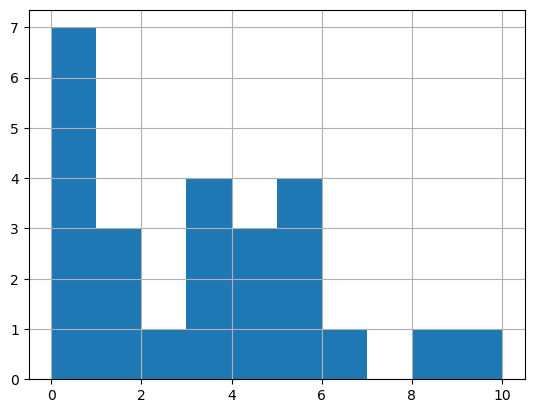

In [23]:
PeruMapaOficial22.Trans2022_minMax.hist()

<Axes: >

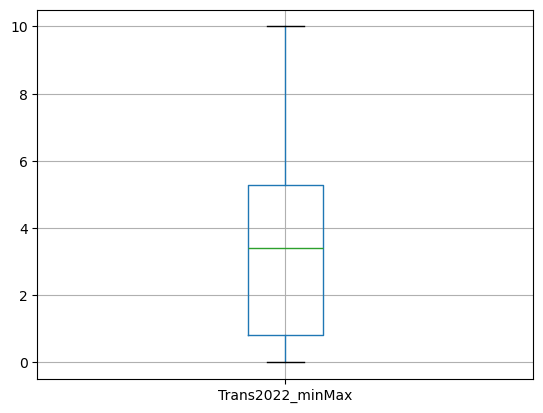

In [24]:
PeruMapaOficial22.boxplot(column=['Trans2022_minMax'])

In [26]:
import mapclassify 
import numpy as np

np.random.seed(12345) # so we all get the same results!

# let's try 5 intervals
K=5
theVar1=PeruMapaOficial22.Trans2022_minMax
# same interval width, easy interpretation
ei5 = mapclassify.EqualInterval(theVar1, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd = mapclassify.StdMean(theVar1)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts                                
q5=mapclassify.Quantiles(theVar1,k=K)

# based on similarity, good for multimodal data 
mb5 = mapclassify.MaximumBreaks(theVar1, k=K)
# based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(theVar1) # no K needed
# based on similarity, optimizer
fj5 = mapclassify.FisherJenks(theVar1, k=K)
# based on similarity, optimizer
jc5 = mapclassify.JenksCaspall(theVar1, k=K)
# based on similarity, optimizer
mp5 = mapclassify.MaxP(theVar1, k=K) 

In [27]:
ht

HeadTailBreaks

   Interval      Count
----------------------
[ 0.00,  3.43] |    13
( 3.43,  5.69] |     8
( 5.69,  7.92] |     2
( 7.92,  9.41] |     1
( 9.41, 10.00] |     1

In [28]:
ht.yb

array([0, 1, 1, 0, 1, 4, 0, 2, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 2, 3, 0,
       0, 0, 0])

In [29]:
np.unique(ht.yb,return_counts=True)

(array([0, 1, 2, 3, 4]), array([13,  8,  2,  1,  1], dtype=int64))

In [30]:
pd.Series(ht.yb).value_counts()

0    13
1     8
2     2
4     1
3     1
Name: count, dtype: int64

In [31]:
ht.bins

array([ 3.43162011,  5.68831724,  7.91578691,  9.40823448, 10.        ])

In [32]:
HT_bins=list(ht.bins)
HT_bins.insert(0,theVar1.min())

<Axes: >

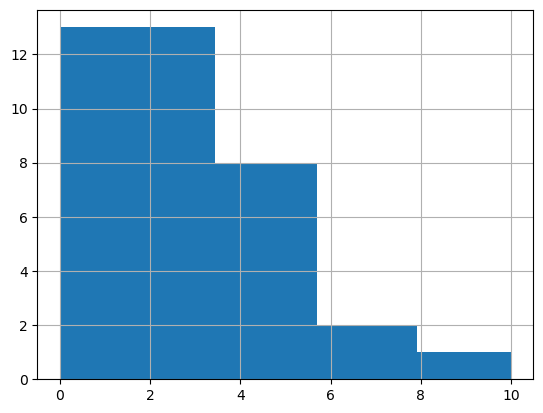

In [33]:
PeruMapaOficial22.Trans2022_minMax.hist(bins=HT_bins)

In [34]:
class5 = q5, ei5,msd, ht, mb5, fj5, jc5, mp5
# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']

<Axes: ylabel='Classifier'>

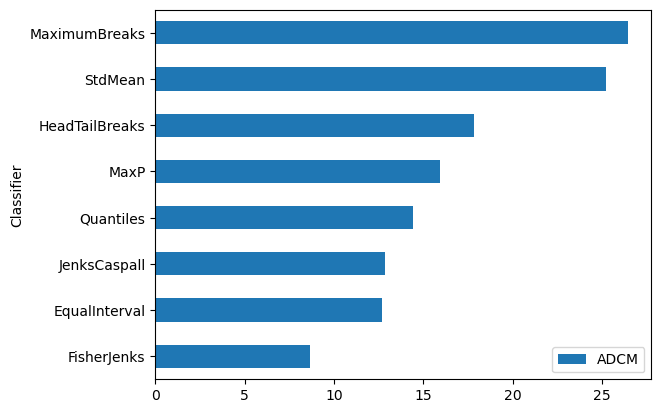

In [35]:
adcms.sort_values('ADCM').plot.barh(x='Classifier')

In [36]:
PeruMapaOficial22['Total_fj5'] = fj5.yb

In [38]:
class5new = ei5,fj5, jc5
pd.DataFrame(
    {c.name: c.counts for c in class5new},
    index=['Class-{}'.format(i) for i in range(5)]
)

,EqualInterval,FisherJenks,JenksCaspall
Class-0,10,7,5
Class-1,5,4,5
Class-2,7,7,3
Class-3,1,5,9
Class-4,2,2,3


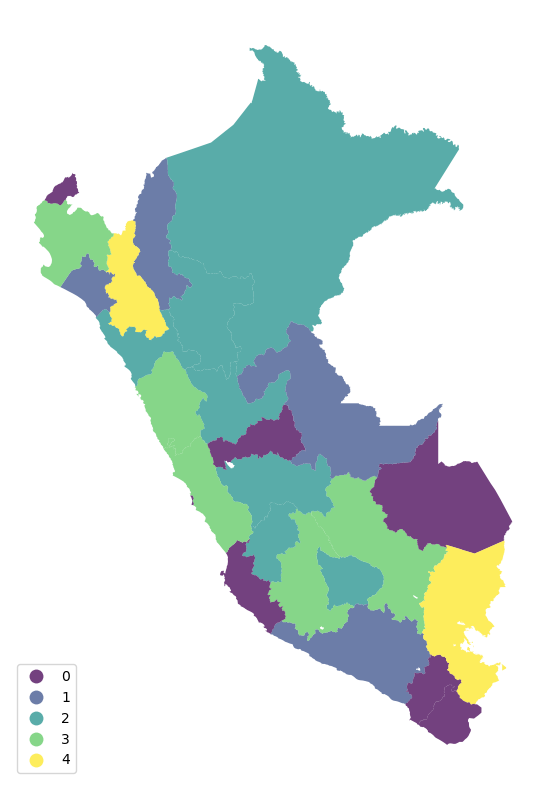

In [41]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
PeruMapaOficial22.plot(column='Total_fj5', 
        cmap='viridis', 
        categorical=True,
        edgecolor='white', 
        linewidth=0., 
        alpha=0.75, 
        legend=True,
        legend_kwds={'loc':3},
        ax=ax
       )

ax.set_axis_off()

In [42]:
# learn "enumerate()":
varsToPlot = ['Total_fj5']
[x for x in enumerate(varsToPlot)]

[(0, 'Total_fj5')]

In [43]:
PeruMapaOficial22.to_file(os.path.join("PeruMapaColoreado2022.gpkg"), layer='Departamentos', driver="GPKG")

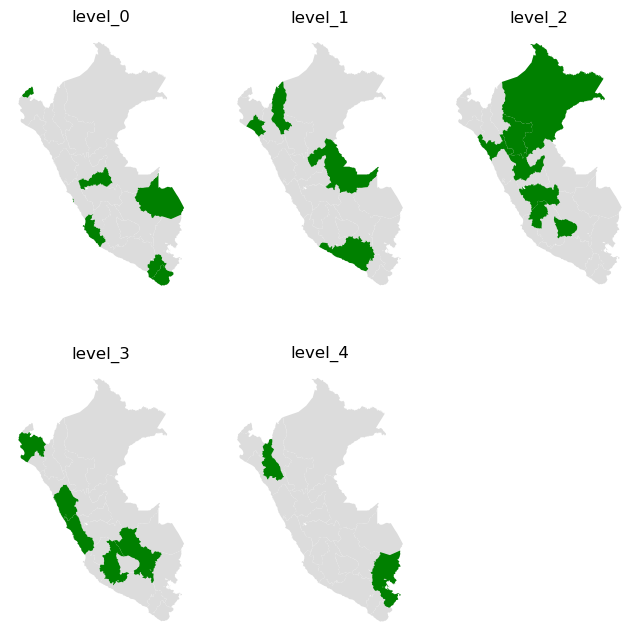

In [45]:
# facetting
f, axs = plt.subplots(nrows=2, ncols=3, figsize=(8, 8))
axs = axs.flatten()

for i in range(5):  
    ax = axs[i]# select the axis where the map will go
    PeruMapaOficial22.plot(ax=ax,color='gainsboro')
    PeruMapaOficial22[PeruMapaOficial22.Total_fj5==i].plot(ax=ax,color='green')
    ax.set_axis_off()
    ax.set_title("level_"+str(i))
f.delaxes(axs[5]) # bye empty subplot
plt.show()